<a href="https://colab.research.google.com/github/RichardKameri/tydata/blob/main/india.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the **Dataset**

In [15]:
import pandas as pd

In [16]:
# load the dataset
df = pd.read_csv('/content/Credit card transactions - India - Simple.csv')

In [17]:
# display the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


Data Cleaning

In [19]:
# change the data type date from object to datetime
df['Date'] = pd.to_datetime(df['Date'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      26052 non-null  int64         
 1   City       26052 non-null  object        
 2   Date       26052 non-null  datetime64[ns]
 3   Card Type  26052 non-null  object        
 4   Exp Type   26052 non-null  object        
 5   Gender     26052 non-null  object        
 6   Amount     26052 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 1.4+ MB
None


In [4]:
# use missingno to check the missing values
import missingno as msno

<Axes: >

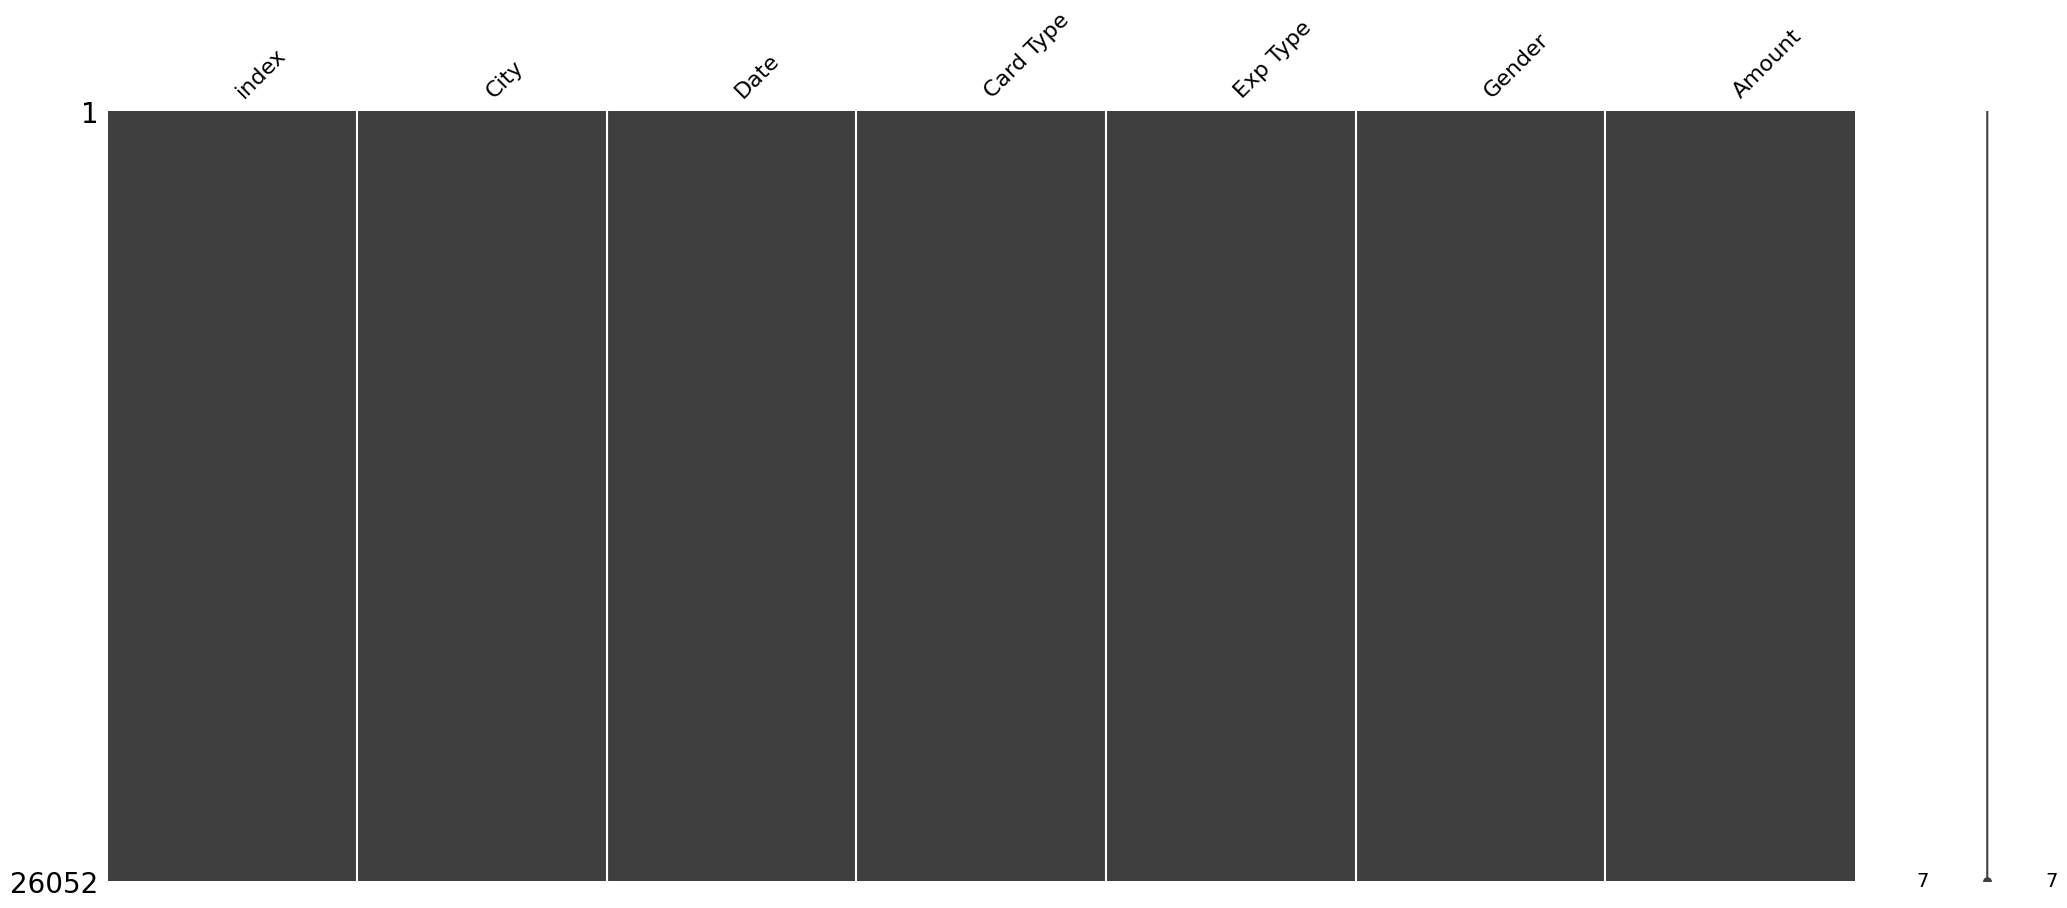

In [5]:
# check missing values
msno.matrix(df)

Initial Visualization

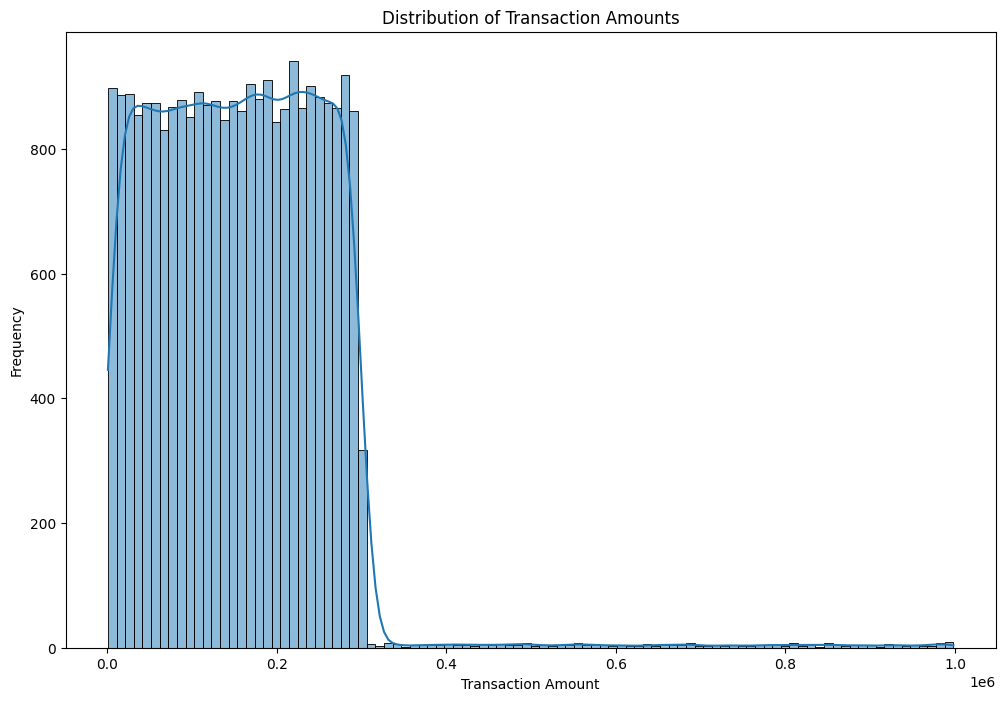

In [6]:
# distribution of transaction amounts
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.histplot(df['Amount'], kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()



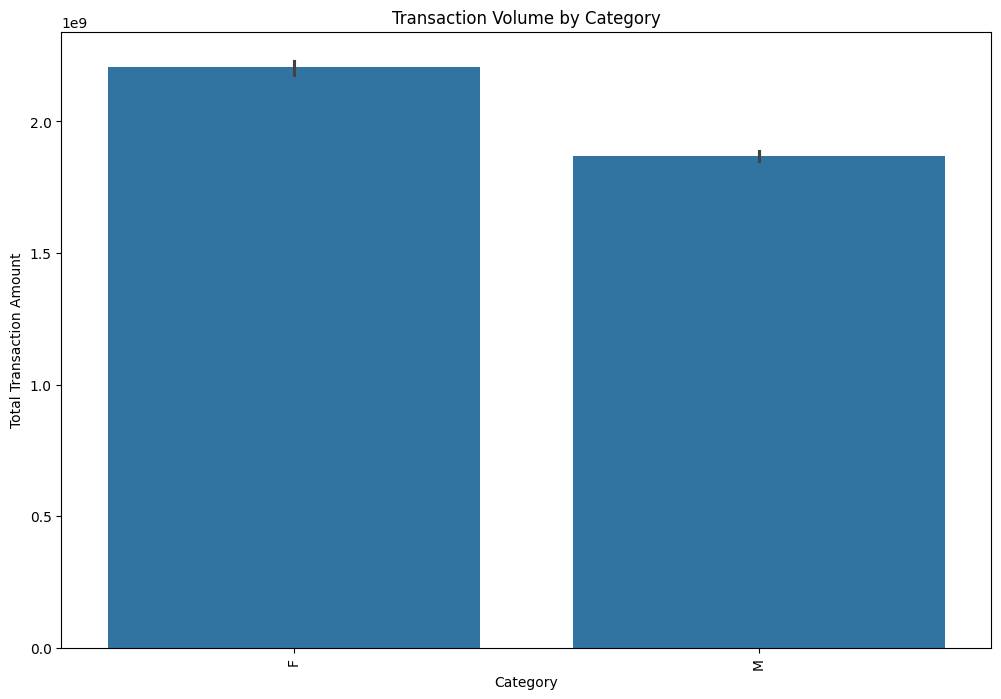

In [7]:
# transactional volume by Gender
plt.figure(figsize=(12, 8))
sns.barplot(x='Gender', y='Amount', data=df, estimator=sum)
plt.title('Transaction Volume by Category')
plt.xlabel('Category')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=90)
plt.show()


: Identify the Cities with the Most and Least Credit Card Transactions

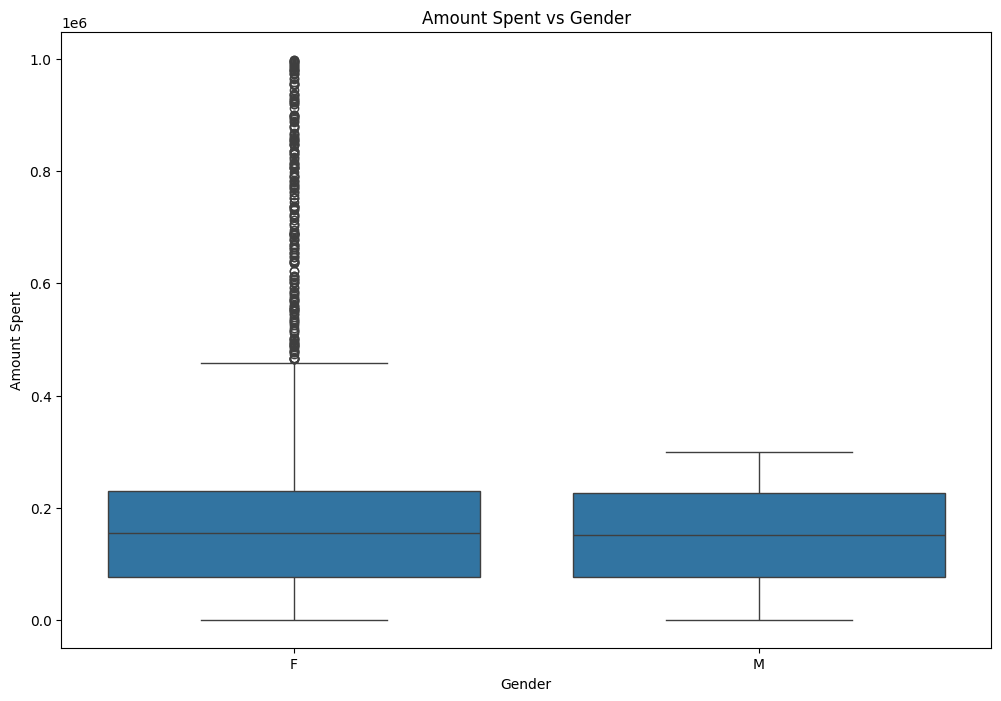

In [9]:
# boxplot to comppare amount spent vs gender
plt.figure(figsize=(12, 8))
sns.boxplot(x='Gender', y='Amount', data=df)
plt.title('Amount Spent vs Gender')
plt.xlabel('Gender')
plt.ylabel('Amount Spent')
plt.show()


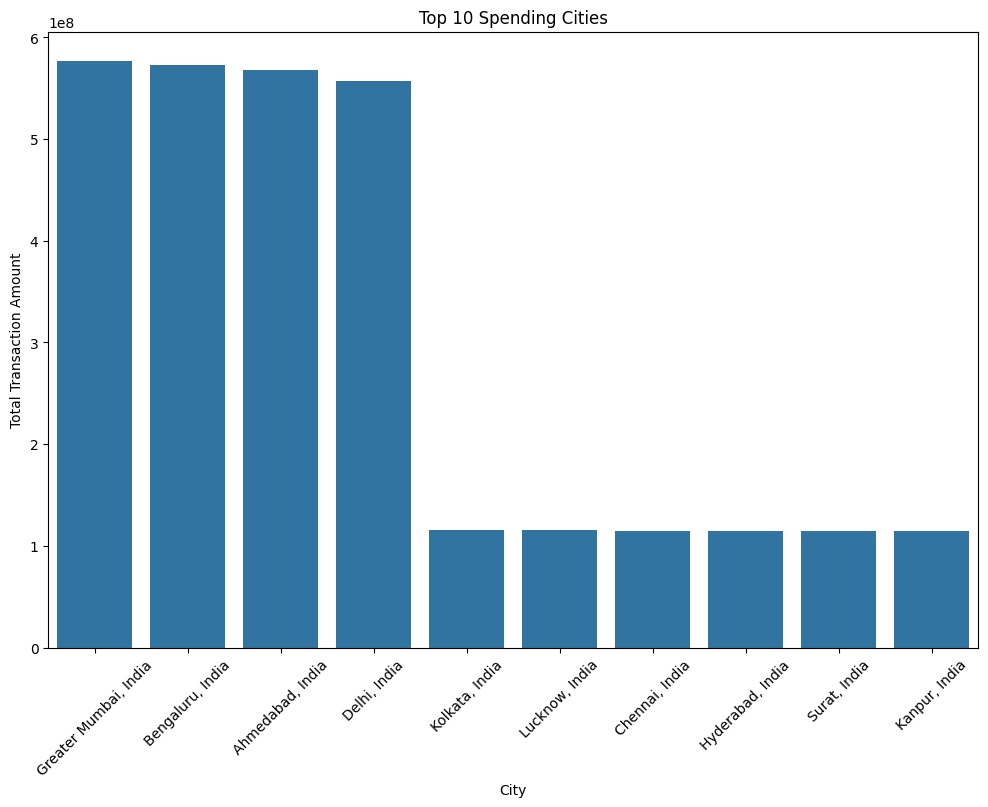

In [11]:
# bar plot showing top 10 spending cities
top_cities = df.groupby('City')['Amount'].sum().nlargest(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Top 10 Spending Cities')
plt.xlabel('City')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.show()

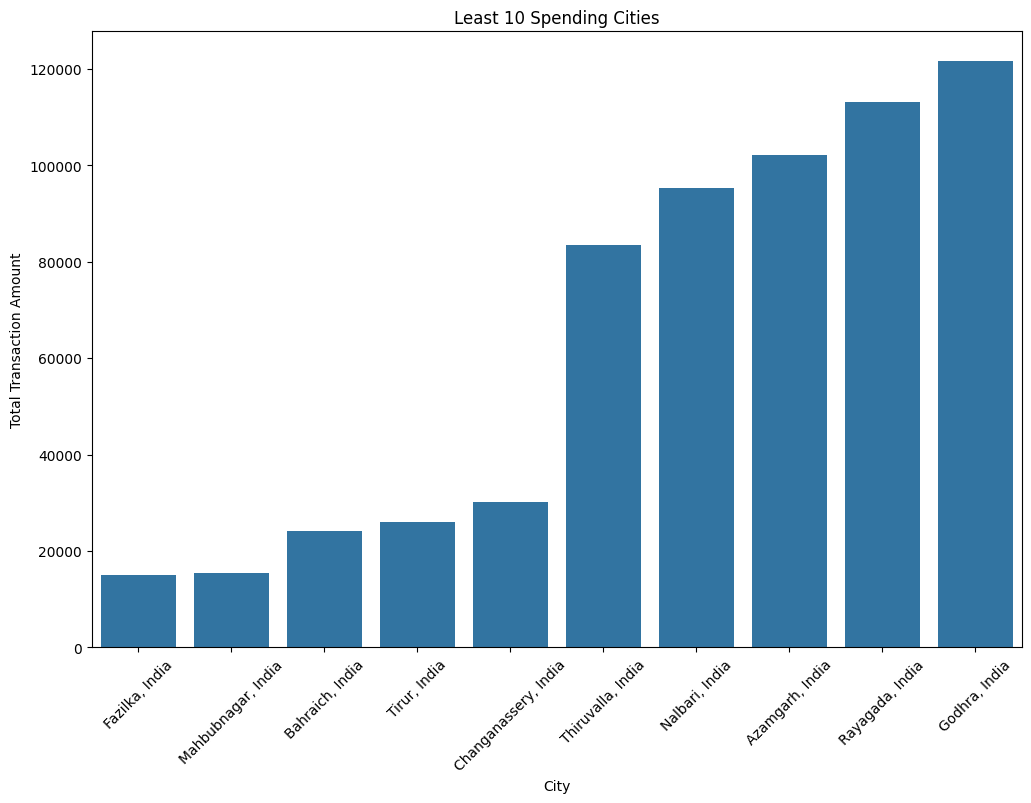

In [12]:
# barplot showing the 10 least spending cities
least_cities = df.groupby('City')['Amount'].sum().nsmallest(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=least_cities.index, y=least_cities.values)
plt.title('Least 10 Spending Cities')
plt.xlabel('City')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.show()

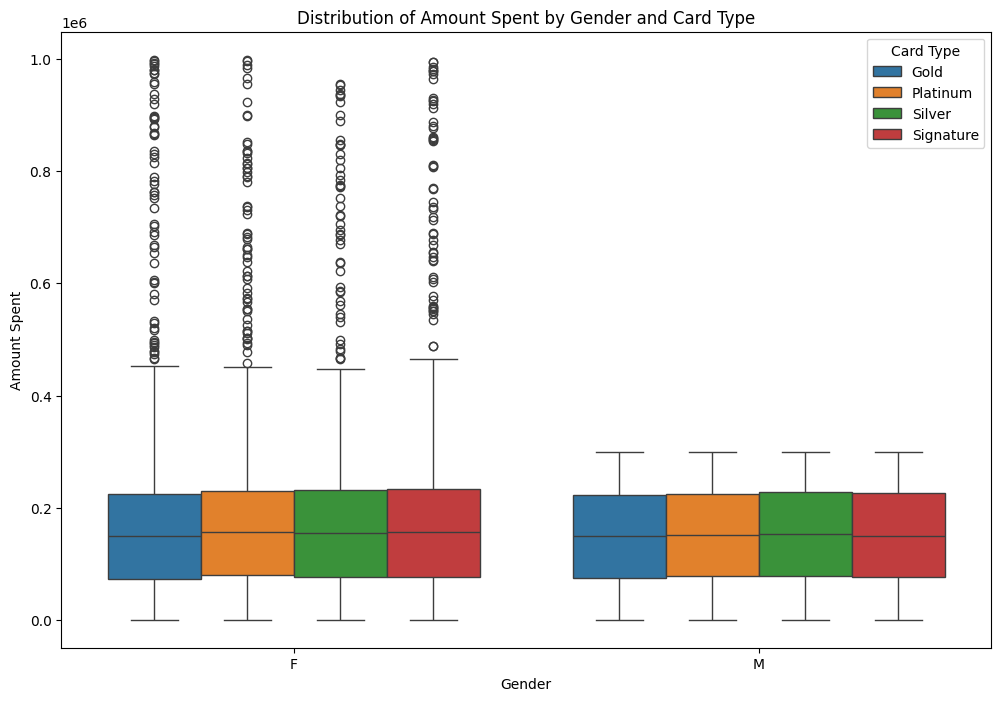

In [23]:
# Distribution of Amount Spent by Gender and Card Type
plt.figure(figsize=(12, 8))
sns.boxplot(x='Gender', y='Amount', hue='Card Type', data=df)
plt.title('Distribution of Amount Spent by Gender and Card Type')
plt.xlabel('Gender')
plt.ylabel('Amount Spent')
plt.legend(title='Card Type')
plt.show()

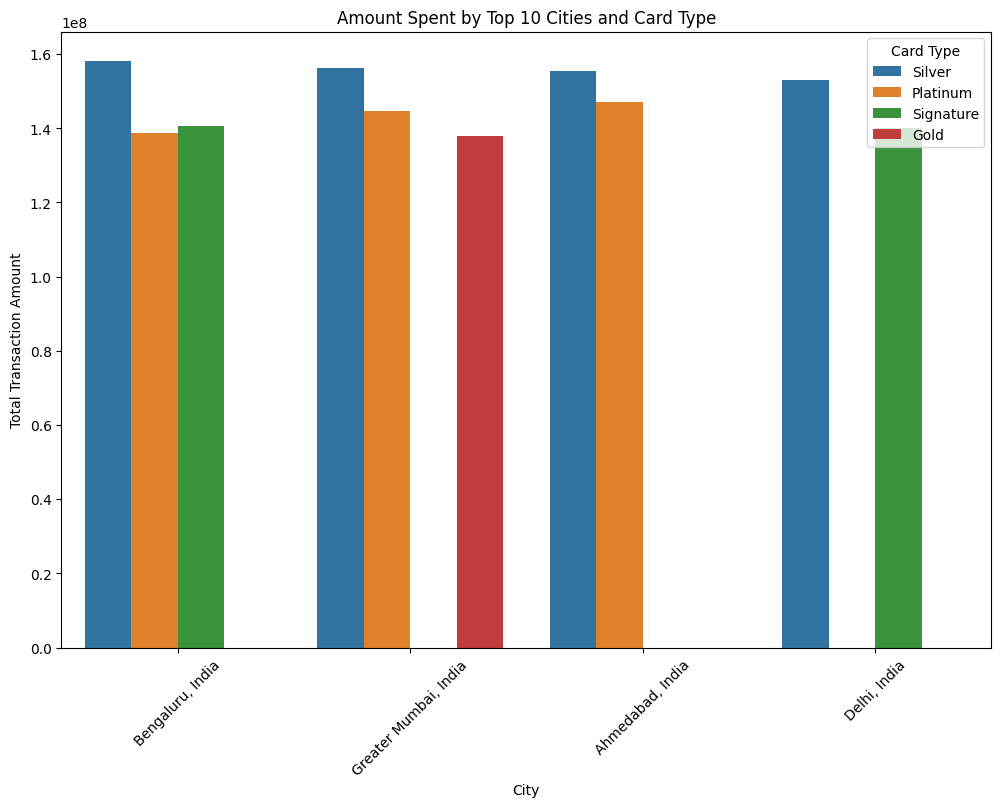

In [24]:
# Amount Spent by top 10 Cities and Card Type
top_cities = df.groupby(['City', 'Card Type'])['Amount'].sum().nlargest(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_cities.index.get_level_values(0), y=top_cities.values, hue=top_cities.index.get_level_values(1))
plt.title('Amount Spent by Top 10 Cities and Card Type')
plt.xlabel('City')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.legend(title='Card Type')
plt.show()

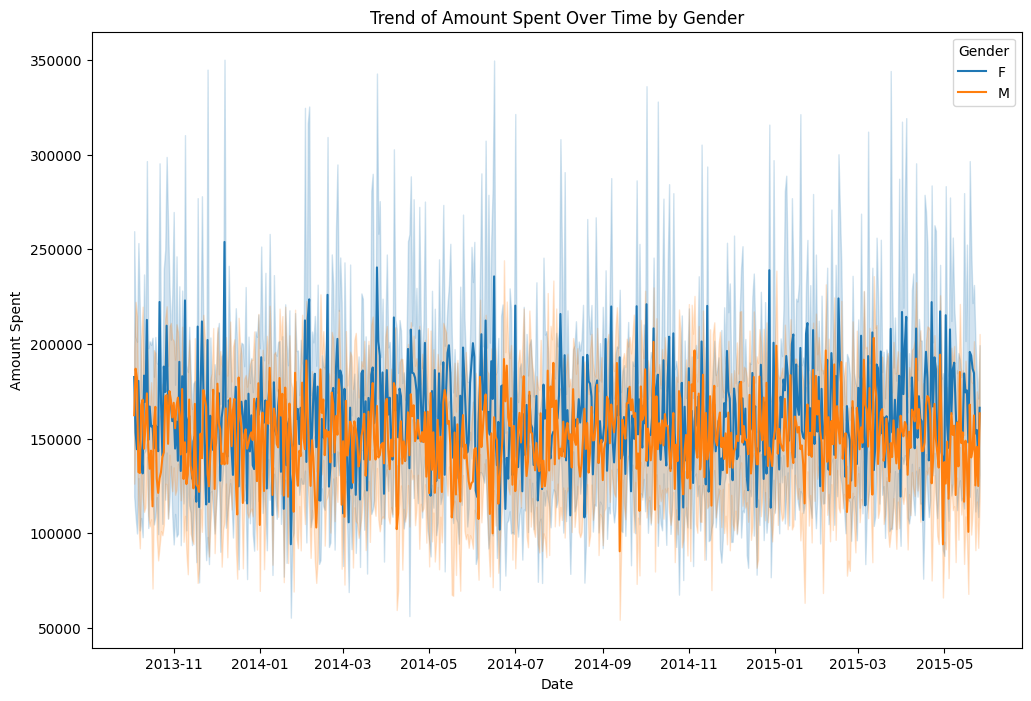

In [25]:
# Trend of Amount Spent Over Time by Gender
plt.figure(figsize=(12, 8))
sns.lineplot(x='Date', y='Amount', hue='Gender', data=df)
plt.title('Trend of Amount Spent Over Time by Gender')
plt.xlabel('Date')
plt.ylabel('Amount Spent')
plt.legend(title='Gender')
plt.show()
